In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [3]:
df = pd.read_csv('./data/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
df_clean = df.drop(columns=['CustomerID', 'Gender'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
print(df_scaled.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


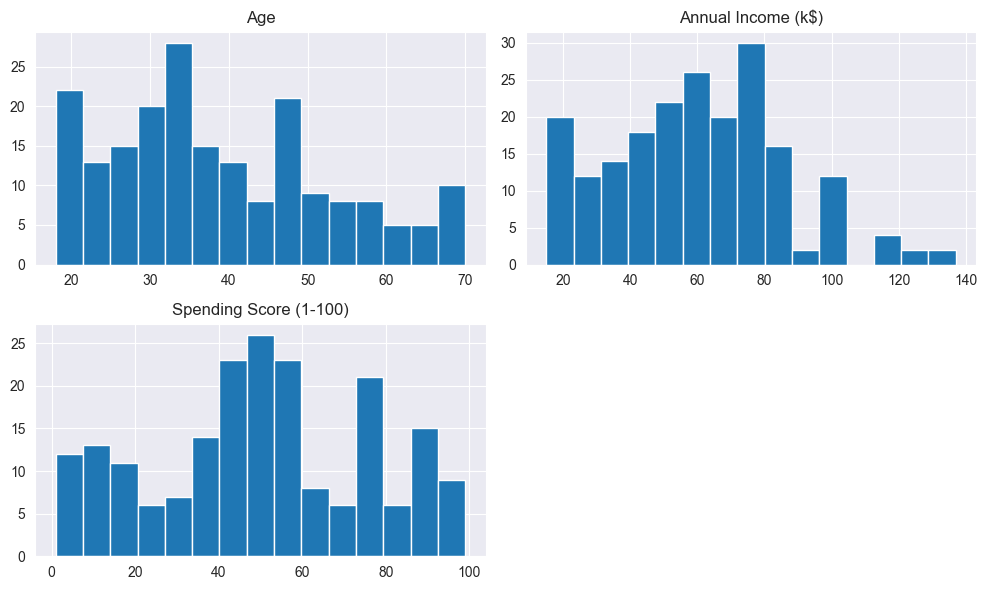

In [7]:
df_clean.hist(bins=15, figsize=(10, 6))
plt.title('Histogram of data')
plt.tight_layout()
plt.show()

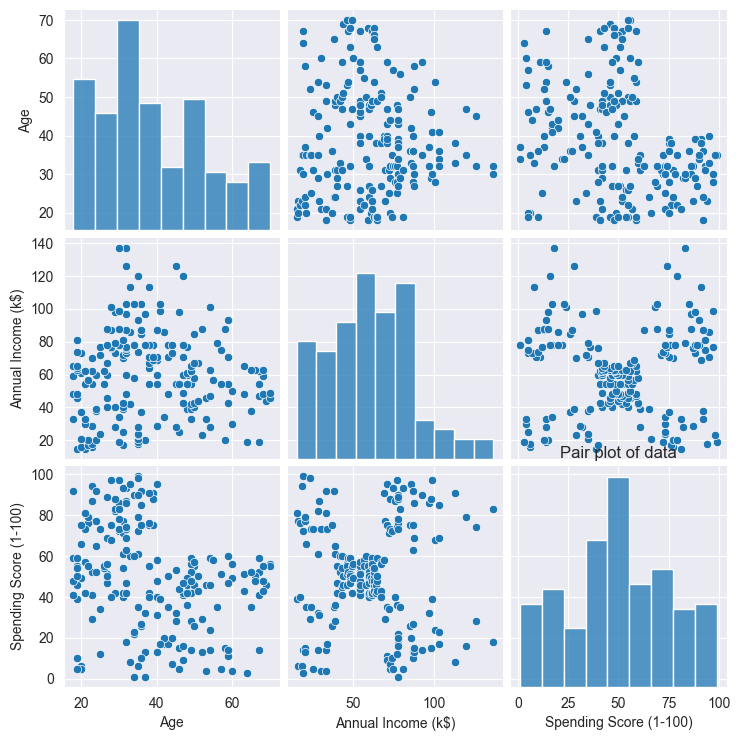

In [8]:
sns.pairplot(df_clean)
plt.title('Pair plot of data')
plt.show()

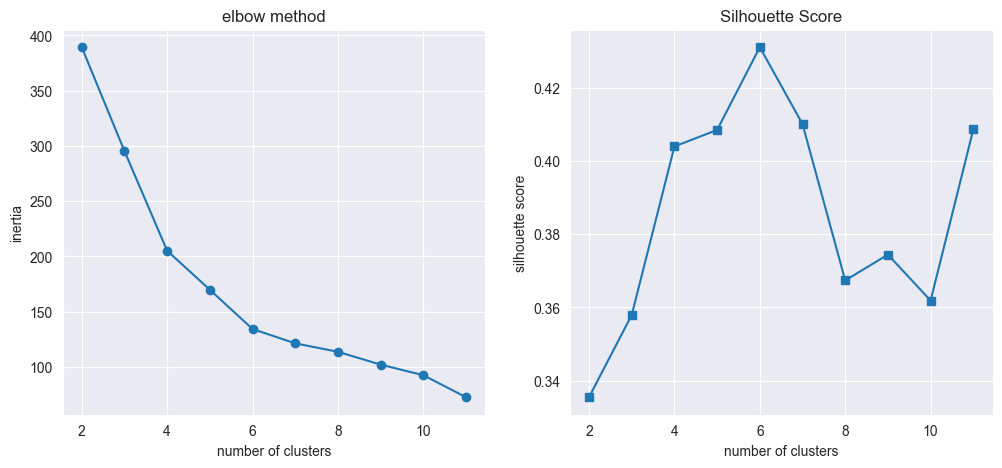

In [63]:
inertia = []
silhouette = []
k_values = range(2, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')

plt.subplot(1,2,2)
plt.plot(k_values, silhouette, marker='s')
plt.title("Silhouette Score")
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['KMeans_Cluster'] = kmeans_labels

In [49]:
dbscan = DBSCAN(eps=0.6, min_samples=9)
dbscan_labels = dbscan.fit_predict(df_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

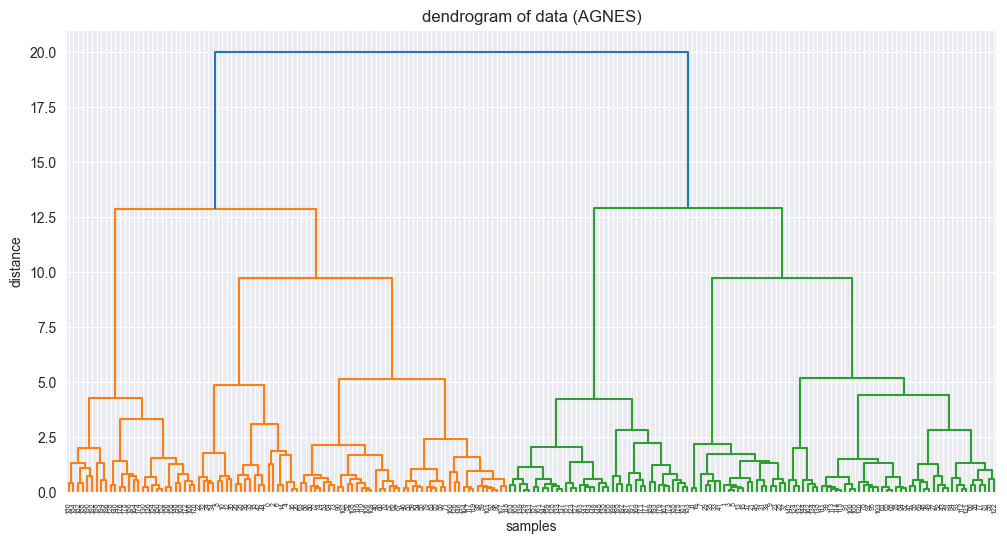

In [66]:
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('dendrogram of data (AGNES)')
plt.xlabel('samples')
plt.ylabel('distance')
plt.show()

agnes_labels = fcluster(linked, t=6, criterion='maxclust')
df['AGNES_Cluster'] = agnes_labels

In [26]:
def describe_clusters(df, cluster_col):
    print(f"\nclustering analysis for {cluster_col}")
    return df.groupby(cluster_col)[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()



In [67]:
print(describe_clusters(df, 'KMeans_Cluster'))
print(describe_clusters(df, 'DBSCAN_Cluster'))
print(describe_clusters(df, 'AGNES_Cluster'))


clustering analysis for KMeans_Cluster
                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               56.333333           54.266667               49.066667
1               32.692308           86.538462               82.128205
2               25.560000           26.480000               76.240000
3               26.125000           59.425000               44.450000
4               44.000000           90.133333               17.933333
5               45.523810           26.285714               19.380952

clustering analysis for DBSCAN_Cluster
                      Age  Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                                       
-1              41.307692           66.753846               27.123077
 0              23.736842           26.105263               78.315789
 1              53.358491           54.905660               47.924528
 2        

In [70]:
print("Silhouette Score - KMeans:", silhouette_score(df_scaled, df['KMeans_Cluster']))

dbscan_valid = df['DBSCAN_Cluster'] != -1
if len(set(df['DBSCAN_Cluster'])) > 1:
    print("Silhouette Score - DBSCAN:", silhouette_score(df_scaled[dbscan_valid], df['DBSCAN_Cluster'][dbscan_valid]))

print("Silhouette Score - AGNES:", silhouette_score(df_scaled, df['AGNES_Cluster']))

Silhouette Score - KMeans: 0.4803521512960826
Silhouette Score - DBSCAN: 0.5172857468987692
Silhouette Score - AGNES: 0.5071807361990631


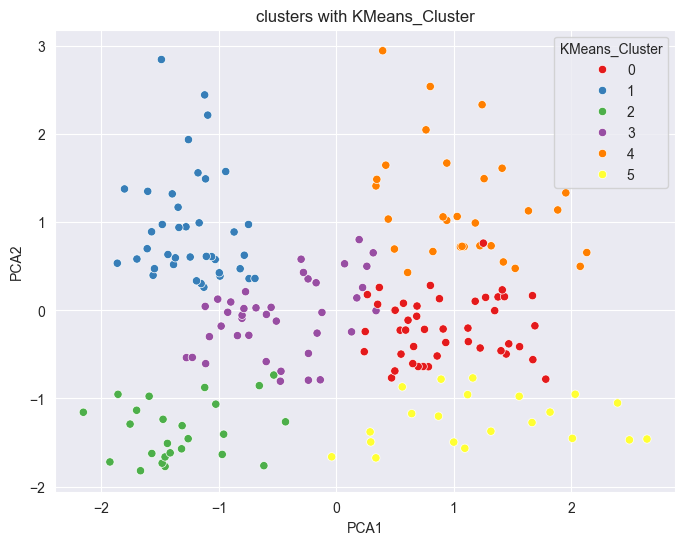

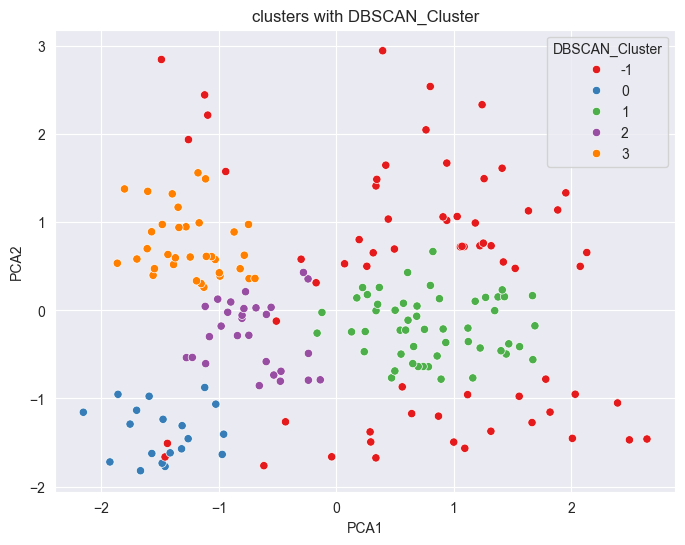

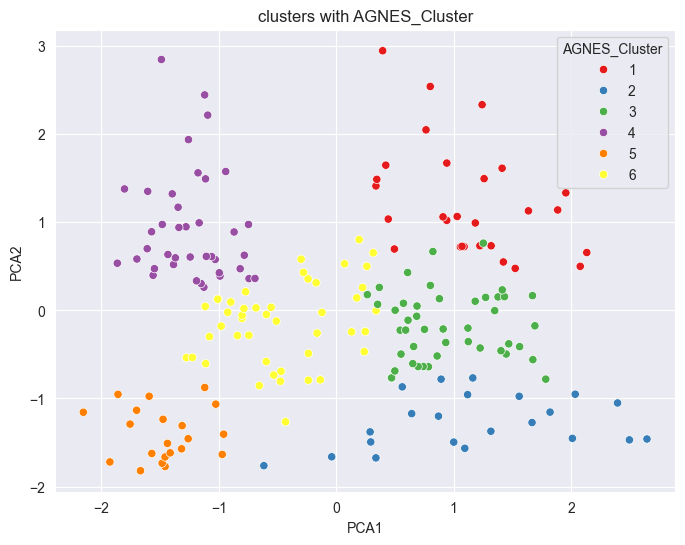

In [69]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(df_scaled)
df['PCA1'], df['PCA2'] = reduced[:, 0], reduced[:, 1]

def plot_clusters(label_col):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue=label_col, palette='Set1')
    plt.title(f"clusters with {label_col}")
    plt.legend(title=label_col)
    plt.show()

plot_clusters('KMeans_Cluster')
plot_clusters('DBSCAN_Cluster')
plot_clusters('AGNES_Cluster')